In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statistics import mode

In [4]:
# Loading the data using pandas
dataoriginal = pd.read_csv(r"d:\ree-trail diabetic\diabetic_data.csv")
print(dataoriginal.shape)

# Exploring the data further
print(dataoriginal.info())
print(dataoriginal.describe())

(101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int

Data Wrangling to make it fit for Analysis

In [7]:
#Dealing with missing values,

datacopy = dataoriginal.copy() 
Rep = datacopy.replace('?', np.nan) 
nacheck = Rep.isnull().sum() 
nacheck

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
#From the above we can see that "Weight,payer_code and medical_specialty" have a lot of missing values thus it is
#best to remove these values from the dataset.

#Dropping these columns,

datacopy= datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)


In [9]:
datacopy['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [10]:
# We can see that there are three types of values:- 'NO','<30','>30'. So, to make it a categorical variable so that different  
# ML techniques can be applies.

datacopy['30readmit'] = np.where(datacopy['readmitted'] == 'NO', 0, 1)


In [11]:
# Removing the pateints from the dataset that are dead.

datacopy = datacopy[((datacopy.discharge_disposition_id != 11) & 
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) & 
                                          (datacopy.discharge_disposition_id != 19) & 
                                          (datacopy.discharge_disposition_id != 20) & 
                                          (datacopy.discharge_disposition_id != 21))] 

In [12]:
datacopy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


Performing Exploratory Data Analysis (EDA)

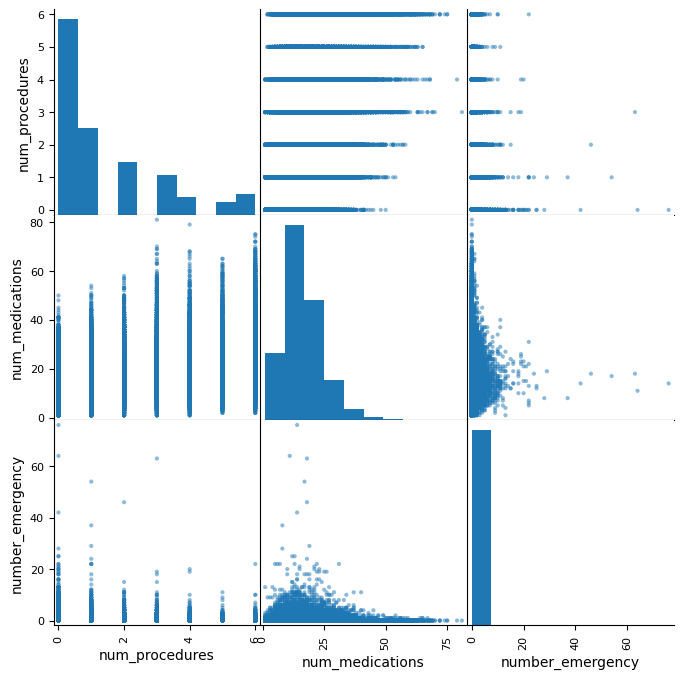

In [14]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between 
# two variables then we can consider one of them.
import seaborn as sns
from pandas.plotting import scatter_matrix

sm = scatter_matrix(datacopy[['num_procedures', 'num_medications', 'number_emergency']], figsize=(8, 8))
sns.despine()

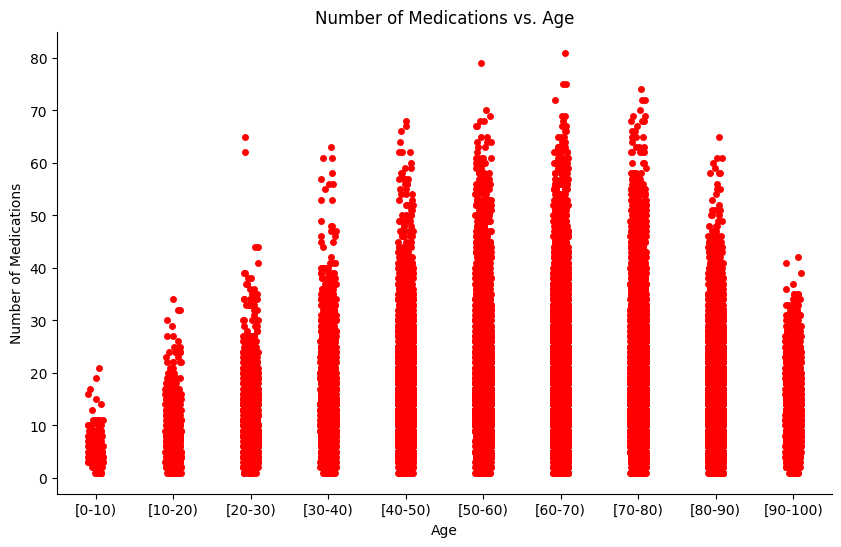

In [15]:
#Let's try to see how the age and number of medicines vary,
sortage = datacopy.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

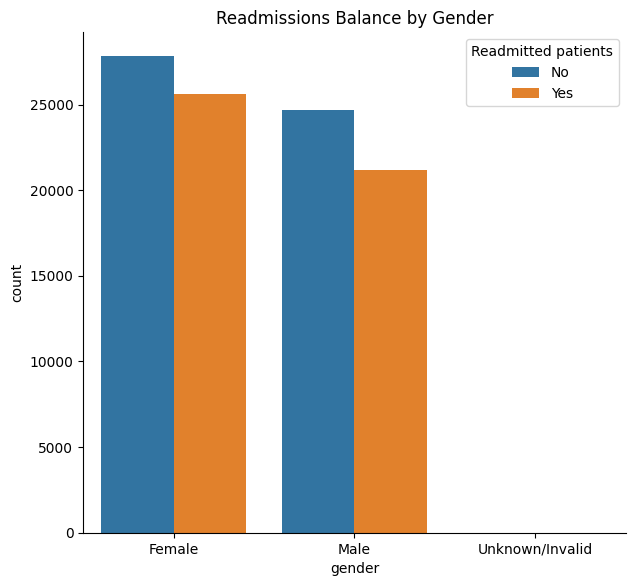

In [16]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = '30readmit', data = datacopy) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

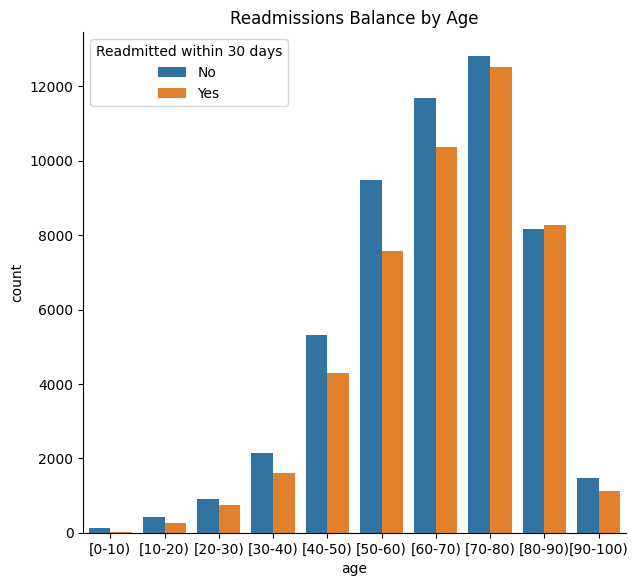

In [17]:
#Relation between age and readmission,

b = datacopy.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = datacopy, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

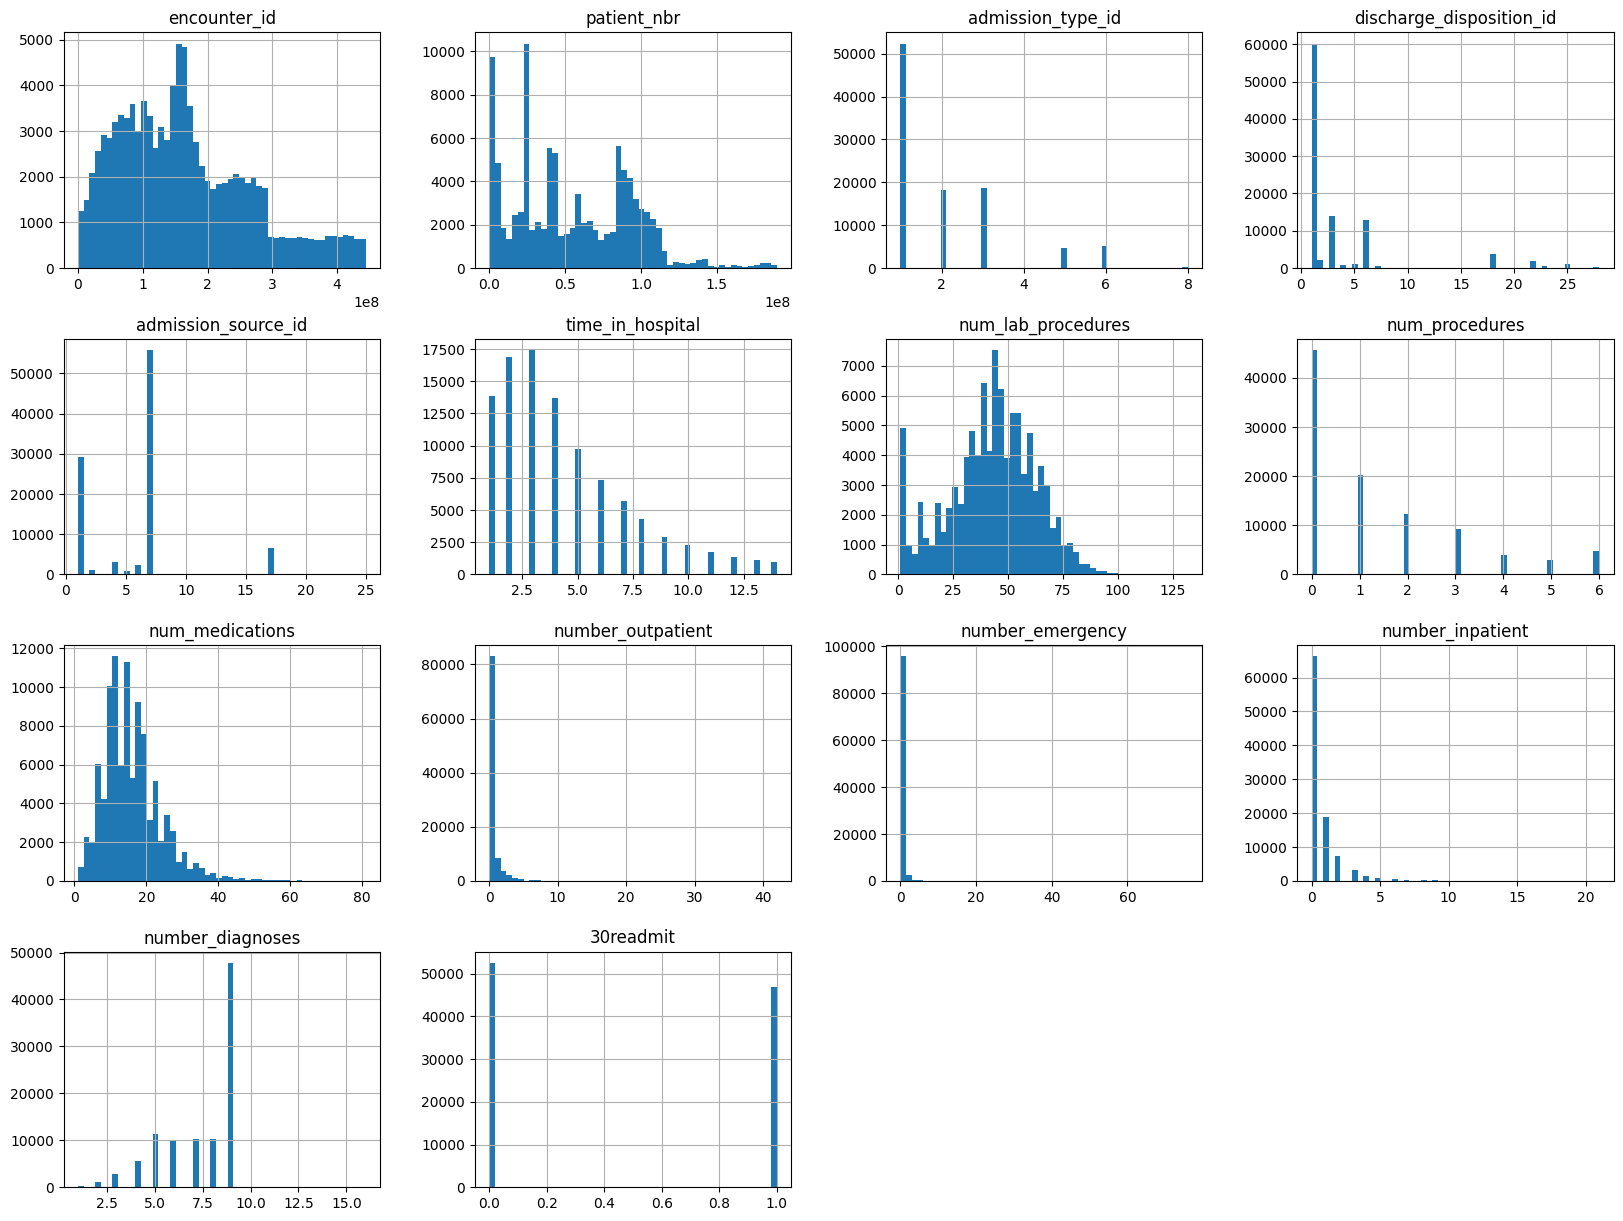

In [18]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
datacopy.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='age', ylabel='count'>

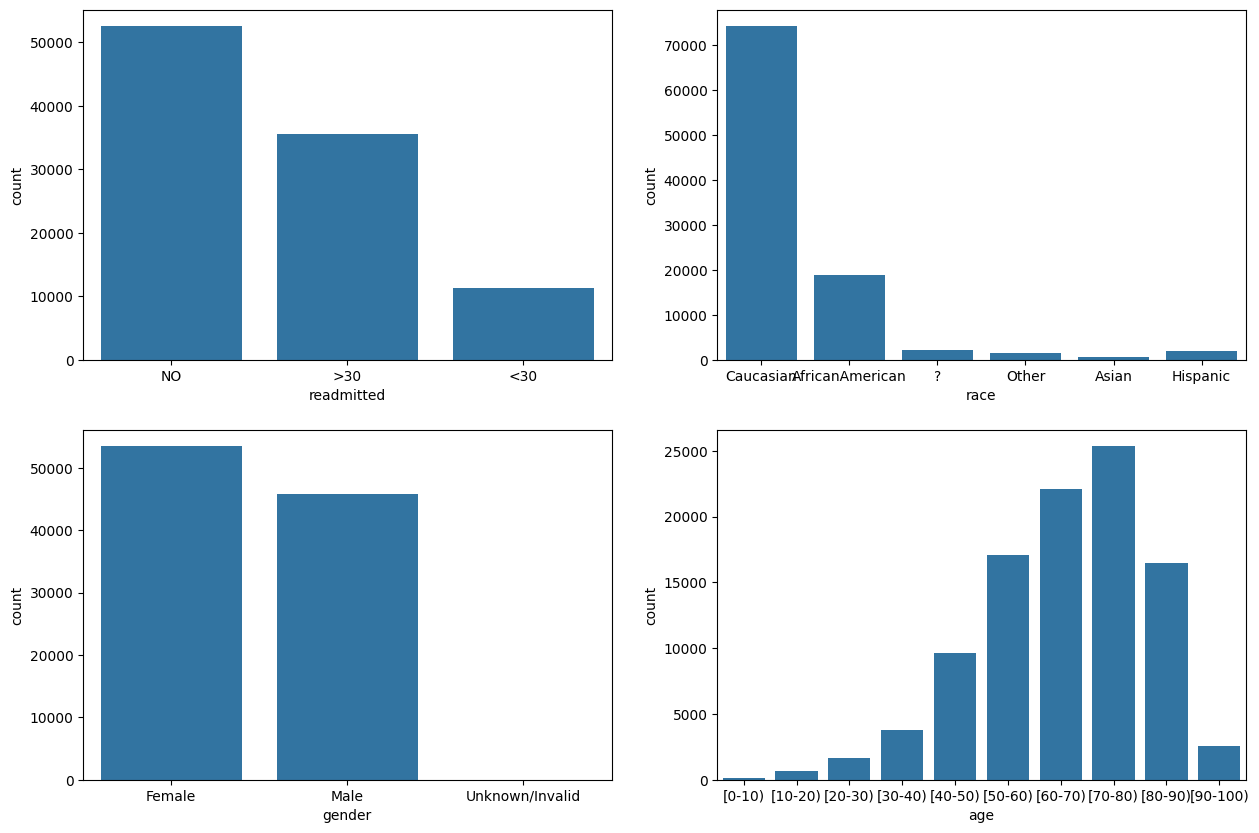

In [19]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=datacopy, ax=ax[0][0])
sns.countplot(x="race", data=datacopy, ax=ax[0][1])
sns.countplot(x="gender", data=datacopy, ax=ax[1][0])
sns.countplot(x="age", data=datacopy, ax=ax[1][1])


**Prediction using ML Models**
Before applying logistic regression, we will have to make the data fit for performing logistic regression.

In [20]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,

numcolumn = datacopy.select_dtypes(include = [np.number]).columns
objcolumn = datacopy.select_dtypes(include = ['object']).columns

In [21]:
# Substituting 0 and unknown,

datacopy[numcolumn] = datacopy[numcolumn].fillna(0)
datacopy[objcolumn] = datacopy[objcolumn].fillna("unknown")


In [22]:
datacopy.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1


In [23]:
#Encoding the data,

def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
datacopy[listcol] = codemap(datacopy[listcol], codes)

In [24]:
#Now let's look at the dataset again and drop the irrelevant columns,

datacopy.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6            

In [25]:
data1 = datacopy.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1) 


In [26]:
data1.head(2)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30readmit
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,1


Normalization of data

In [27]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,6.866322e-17,-8.239586e-17,-5.149741e-17,3.662038e-17,-4.577548e-17,-4.577548e-17,-3.662038e-17,2.380325e-16,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


In [28]:
#Let's store readmitted in y and rest of the columns in X,

Y = data1['30readmit']
X = data1.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

Normalization of data
Splitting the data into training and vallidation data sets. The training data will contain 80 % of the data and validation will contain remaining 20%

In [29]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [30]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 169) (19869, 169)


Logistic Regression

In [33]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005, max_iter=1000)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [34]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.62756052141527


In [35]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8377 2129]
 [5271 4092]]


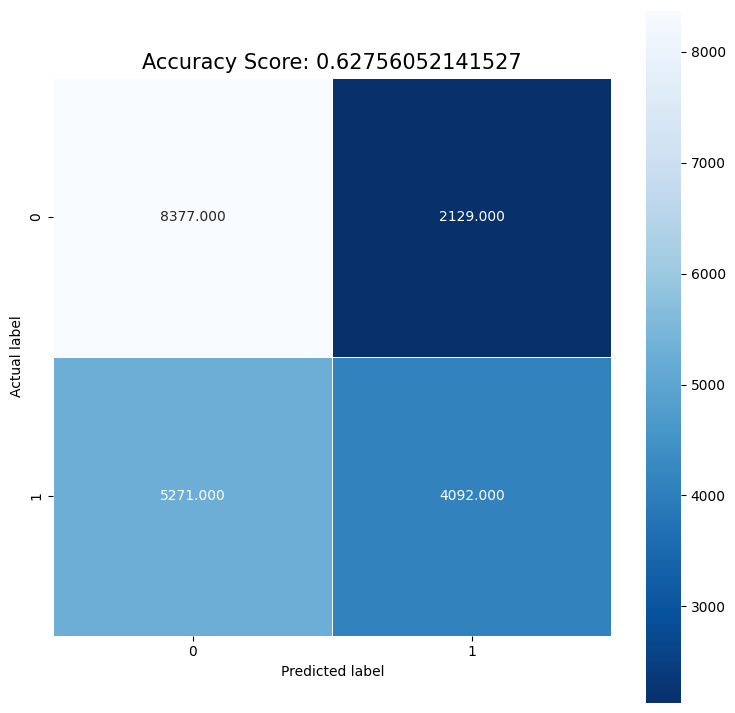

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [37]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10506
         YES       0.66      0.44      0.53      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.63      0.63      0.61     19869



In [38]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

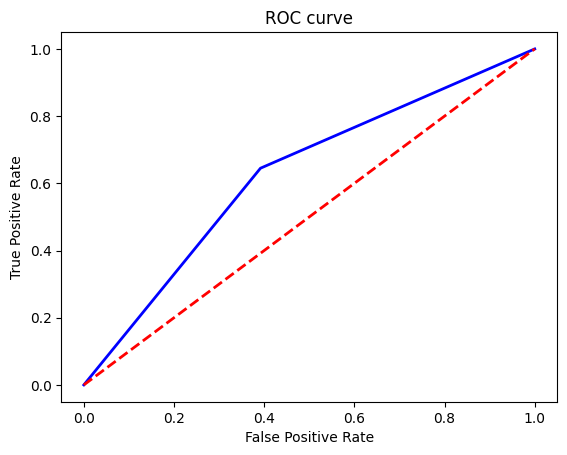

In [39]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Logistic Regression
As seen from the above, the performance of our model is average, not too great. So, let's go ahead and see other models.

**Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [41]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [42]:
#Checking the accuracy,

print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6339523881423322


In [43]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7546 2960]
 [4313 5050]]


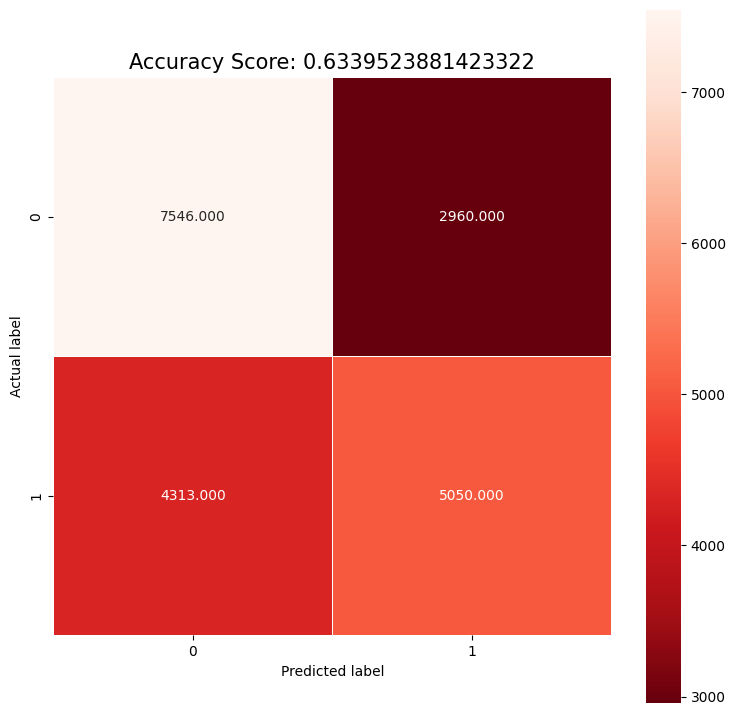

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [45]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.72      0.67     10506
         YES       0.63      0.54      0.58      9363

    accuracy                           0.63     19869
   macro avg       0.63      0.63      0.63     19869
weighted avg       0.63      0.63      0.63     19869



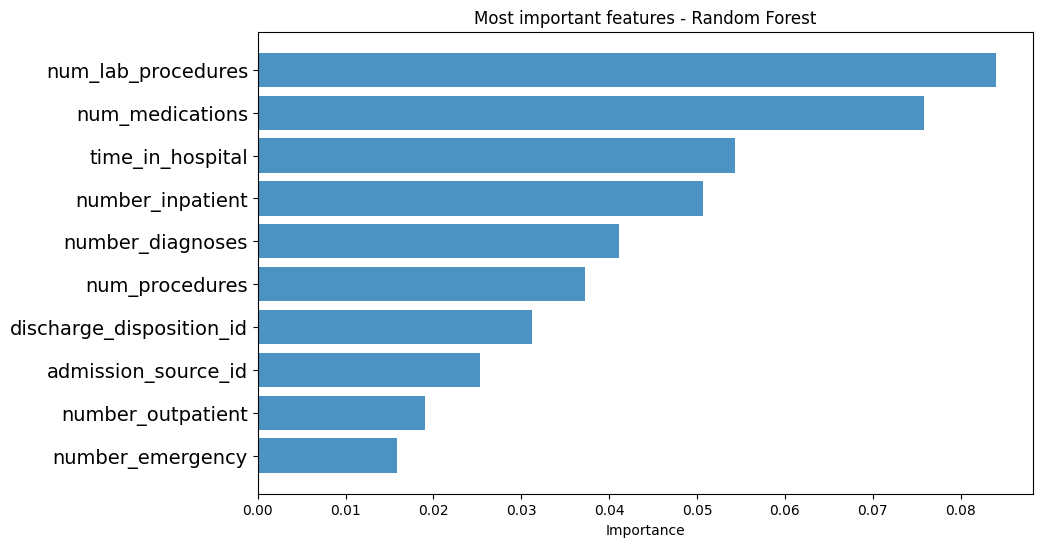

In [46]:
#Determining which features are most important,
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

AdaBoosted Classification model

In [47]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(Xtrain, Ytrain)
yadaclas = adaclass.predict(Xtest)

In [48]:
print("The accurary of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest))

The accurary of AdaBoosted Classification model:  0.6233831596960089


In [49]:
#Checking the confusion matrix,
print(confusion_matrix(Ytest, yadaclas))

[[8553 1953]
 [5530 3833]]


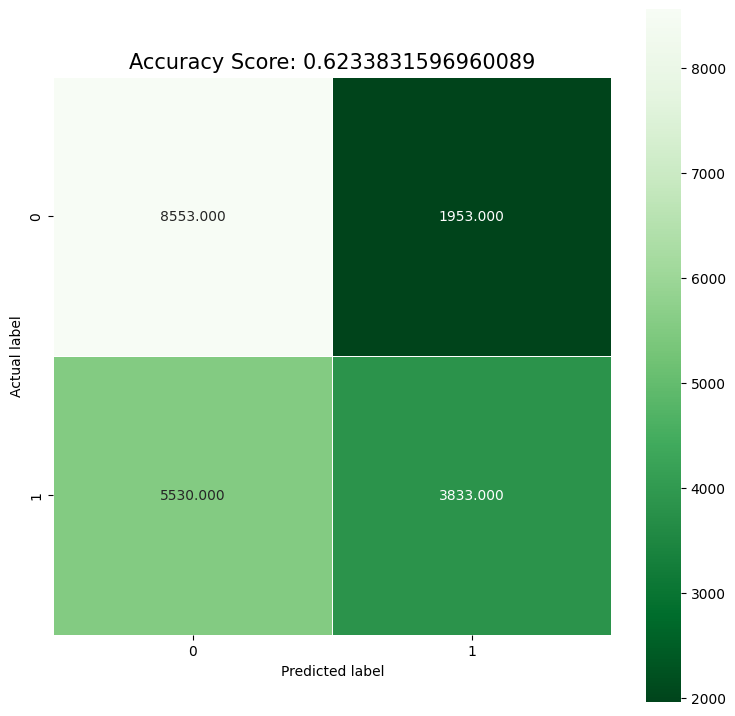

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [51]:
#Checking recall, f1 :-
print(classification_report(Ytest, yadaclas, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.81      0.70     10506
         YES       0.66      0.41      0.51      9363

    accuracy                           0.62     19869
   macro avg       0.63      0.61      0.60     19869
weighted avg       0.63      0.62      0.61     19869



In [52]:
# calculate the False Positive and True Positive rate to get the ROC curve  
yadaclas = adaclass.decision_function(Xtest)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Ytest, yadaclas)

The accuracy can be improved by tuning the model, so let's do that.

**Hyperparameters Tunning for AdaBoosted**

In [54]:
# Doing parameter tuning,
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
gridparam = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.2, 0.5, 1.0]
}
adagrid = GridSearchCV(ada_boost, cv=3, n_jobs=3, param_grid=gridparam)
adagrid.fit(Xtrain, Ytrain)

,estimator,AdaBoostClass...dom_state=123)
,param_grid,"{'learning_rate': [0.2, 0.5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,3
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [55]:
#The accuracy of the model with the best parameters
adagrid.score(Xtest, Ytest)

0.6337007398459913

In [56]:
gridyada = adagrid.predict(Xtest)
print(classification_report(Ytest, gridyada, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.62      0.77      0.69     10506
         YES       0.65      0.48      0.55      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.63      0.62     19869
weighted avg       0.64      0.63      0.63     19869



In [57]:
ygridadascore = adagrid.decision_function(Xtest)
fpr_adamod, tpr_adamod, thresholds_grid_ada = roc_curve(Ytest, ygridadascore)

**Decision tree**

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [65]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1], shape=(19869,))

In [67]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


**Comparing the models**

In [69]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(Ytest, yadaclas)#Ada boost classifier
fpr_adamod, tpr_adamod, thresholds = roc_curve(Ytest,ygridadascore )#Hyperparameters Tunning for AdaBoosted
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )

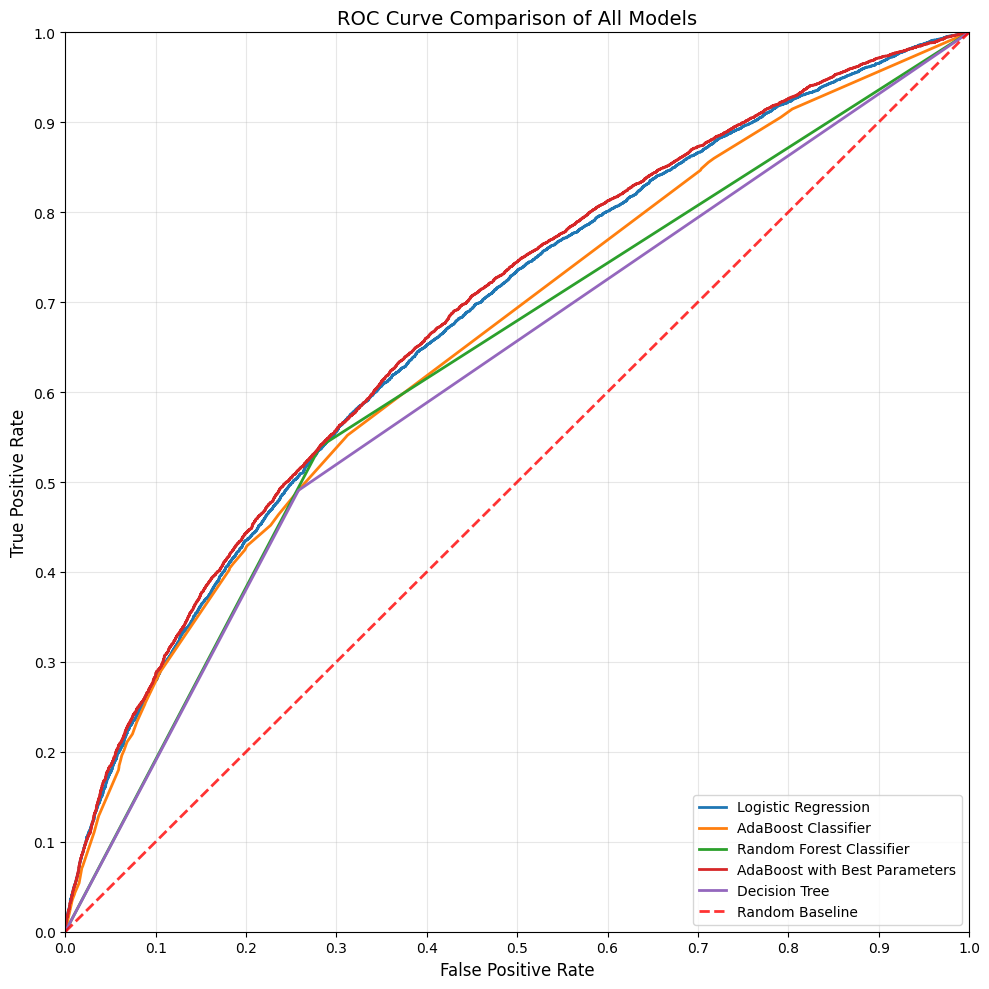

In [72]:
# Compare the ROC curve between different models
plt.figure(figsize=(10, 10))
plt.plot(fpr_log, tpr_log, label='Logistic Regression', lw=2)
plt.plot(fpr_adaclf, tpr_adaclf, label='AdaBoost Classifier', lw=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier', lw=2)
plt.plot(fpr_adamod, tpr_adamod, label='AdaBoost with Best Parameters', lw=2)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', fontsize=10)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison of All Models', fontsize=14)
plt.tight_layout()
plt.show()

In [73]:
print(" Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print("Accuracy of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest)*100)
print("Accuracy of Hyperparameter Tuning AdaBoosted Classification model: ", adagrid.score(Xtest, Ytest)*100)
print( "Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

 Accuracy of Logistic regression model: 62.75605214152699
Accuracy of Random forest classification:  63.395238814233224
Accuracy of Random forest classification:  63.395238814233224
Accuracy of AdaBoosted Classification model:  62.338315969600885
Accuracy of AdaBoosted Classification model:  62.338315969600885
Accuracy of Hyperparameter Tuning AdaBoosted Classification model:  63.37007398459913
Accuracy of Decision Tree  62.358447833308176
Accuracy of Hyperparameter Tuning AdaBoosted Classification model:  63.37007398459913
Accuracy of Decision Tree  62.358447833308176


In [74]:
# Create a comparison table of all models
model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest Classifier',
        'AdaBoost Classifier',
        'AdaBoost (Hyperparameter Tuned)',
        'Decision Tree'
    ],
    'Accuracy (%)': [
        round(logisticreg.score(Xtest, Ytest) * 100, 2),
        round(random_forest.score(Xtest, Ytest) * 100, 2),
        round(adaclass.score(Xtest, Ytest) * 100, 2),
        round(adagrid.score(Xtest, Ytest) * 100, 2),
        round(accuracy_score(Ytest, ypreddt) * 100, 2)
    ]
})

# Sort by accuracy in descending order
model_comparison = model_comparison.sort_values('Accuracy (%)', ascending=False).reset_index(drop=True)
model_comparison.index = model_comparison.index + 1  # Start index from 1
model_comparison.index.name = 'Rank'

print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(model_comparison.to_string())
print("="*60)

# Display as a styled dataframe
model_comparison


MODEL PERFORMANCE COMPARISON
                                Model  Accuracy (%)
Rank                                               
1            Random Forest Classifier         63.40
2     AdaBoost (Hyperparameter Tuned)         63.37
3                 Logistic Regression         62.76
4                       Decision Tree         62.36
5                 AdaBoost Classifier         62.34


,Model,Accuracy (%)
Rank,,
1,Random Forest Classifier,63.40
2,AdaBoost (Hyperparameter Tuned),63.37
3,Logistic Regression,62.76
4,Decision Tree,62.36
5,AdaBoost Classifier,62.34
